Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


Read dataset from csv using Pandas

In [4]:
df = pd.read_csv('./breast-cancer-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Trasnfrom the data and apply map

In [5]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)
# Label Encoding
df_map = {'M': 1, 'B': 0}
df = df.applymap(lambda s: df_map.get(s) if s in df_map else s)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Separate dataset to malignant and bening to study outliers

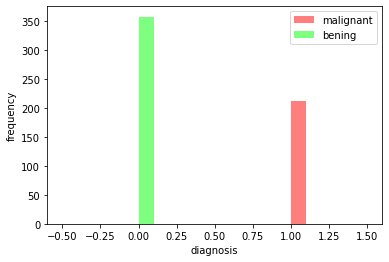

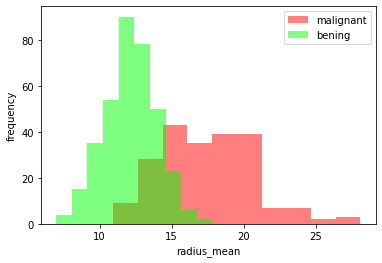

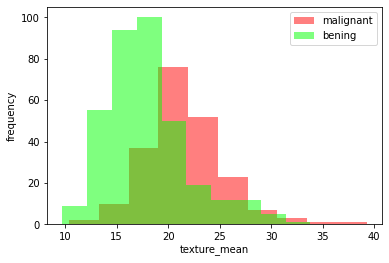

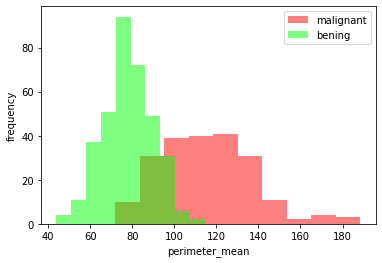

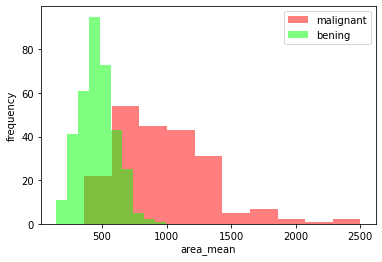

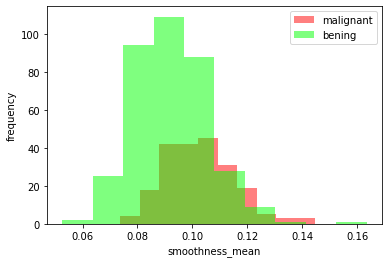

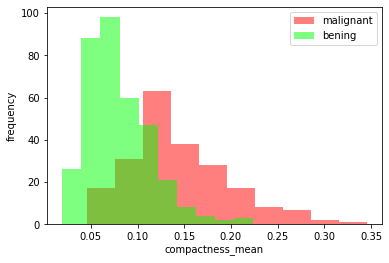

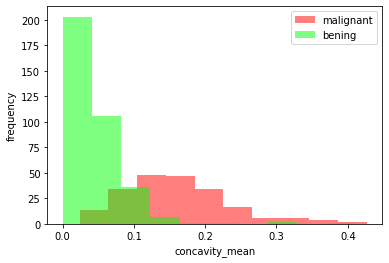

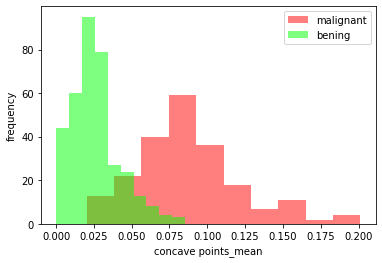

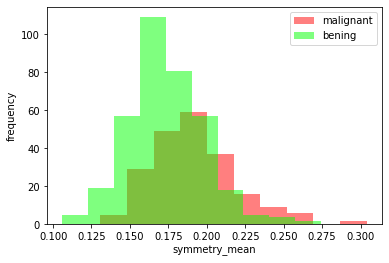

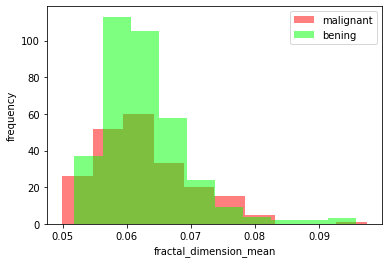

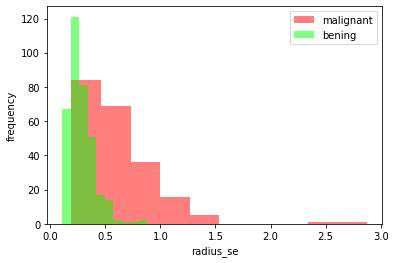

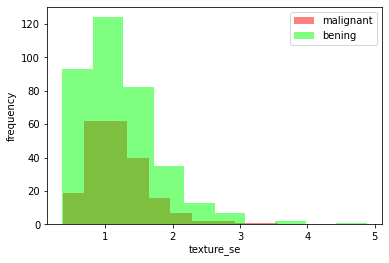

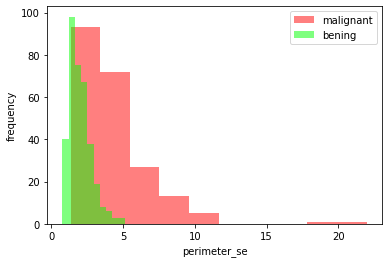

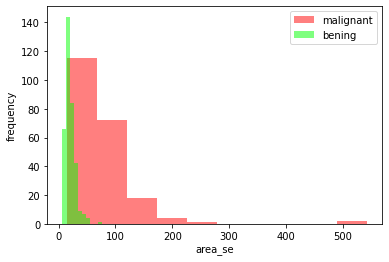

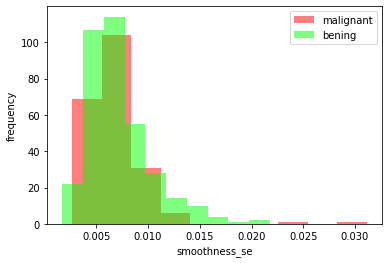

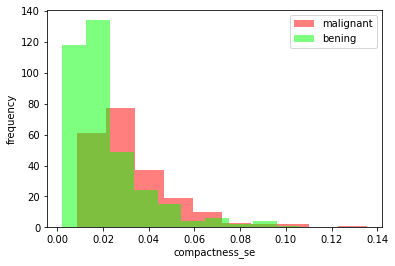

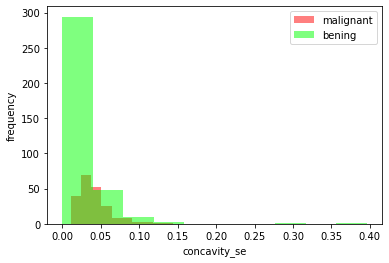

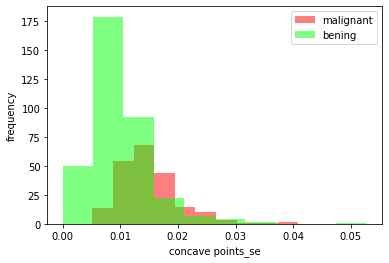

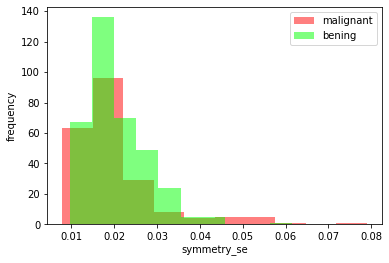

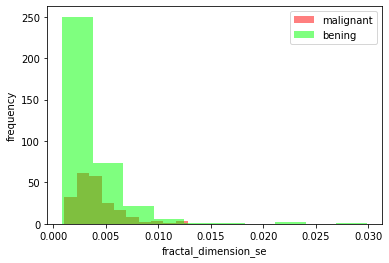

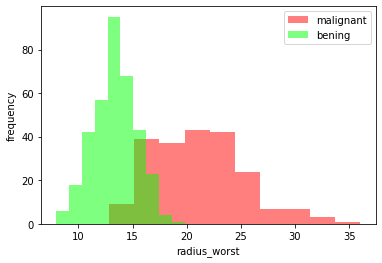

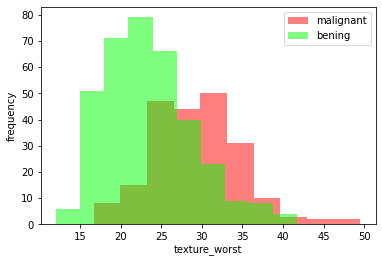

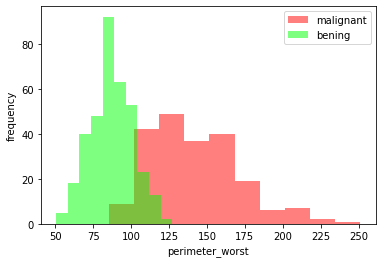

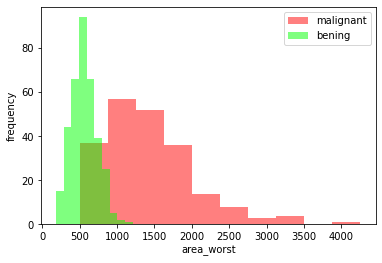

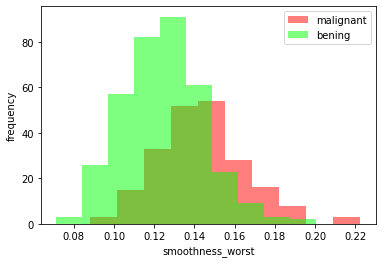

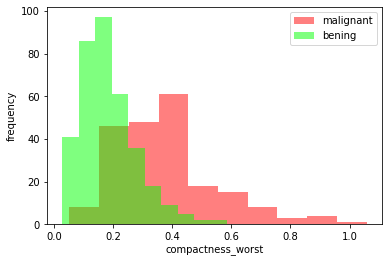

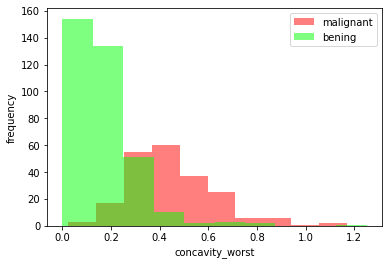

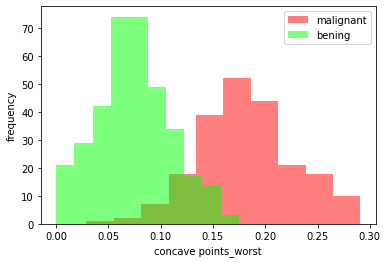

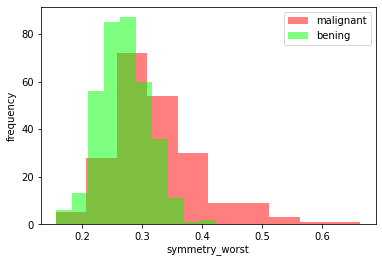

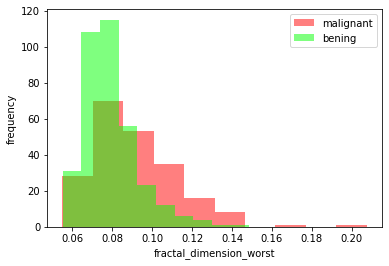

In [6]:
all_features = df.columns
malignant_df = df[df["diagnosis"] == 1]
bening_df = df[df["diagnosis"] == 0]
for feature in all_features:
    m = plt.hist(malignant_df[feature],
                 fc=(1, 0, 0, 0.5), label="malignant")
    b = plt.hist(bening_df[feature],
                 fc=(0, 1, 0, 0.5), label="bening")
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel("frequency")
    plt.show()


Define suspected meninglent features that include outliers and calculate outliers

In [7]:
suspected_malignant_features = ['fractal_dimension_worst', 'smoothness_worst', 'area_worst', 'symmetry_worst','concave points_se','area_se','perimeter_se','radius_se']
for feature in suspected_malignant_features:
    desc = malignant_df[feature].describe()
    lower_quartile = desc[4]
    upper_quartile = desc[6]
    inter_quartile_range = upper_quartile-lower_quartile
    lower_bound = lower_quartile - 1.5*inter_quartile_range
    upper_bound = upper_quartile + 1.5*inter_quartile_range
    bening_df_less = malignant_df[(malignant_df[feature] < lower_bound) | (
        malignant_df[feature] > upper_bound)][feature].values
    print(f'bening {feature} outlier range: {lower_bound}, {upper_bound}')
    print(f'bening {feature} outliers: [{bening_df_less}]')


bening fractal_dimension_worst outlier range: 0.03681875, 0.14210875
bening fractal_dimension_worst outliers: [[0.173  0.2075 0.1431 0.1446]]
bening smoothness_worst outlier range: 0.09222500000000002, 0.19422499999999998
bening smoothness_worst outliers: [[0.2098  0.08822 0.2226  0.2184 ]]
bening area_worst outlier range: -143.37500000000023, 2826.425
bening area_worst outliers: [[3216. 2944. 3432. 2906. 3234. 3143. 4254.]]
bening symmetry_worst outlier range: 0.15241250000000012, 0.48331249999999987
bening symmetry_worst outliers: [[0.6638 0.4863 0.544  0.4882 0.5774 0.5166 0.5558]]
bening concave points_se outlier range: 0.00229125, 0.02662125
bening concave points_se outliers: [[0.0409  0.02801 0.02794 0.02765 0.03927 0.03024 0.03441]]
bening area_se outlier range: -51.593749999999986, 181.35625
bening area_se outliers: [[233.  525.6 199.7 224.1 542.2]]
bening perimeter_se outlier range: -1.0206249999999994, 8.942374999999998
bening perimeter_se outliers: [[11.07  10.05   9.807 21.

Define suspected bening features that include outliers and calculate outliers

In [8]:
suspected_bening_features = ['concavity_worst','fractal_dimension_se','symmetry_se','concave points_se','texture_se', 'concavity_se']
for feature in suspected_bening_features:
    desc = bening_df[feature].describe()
    lower_quartile = desc[4]
    upper_quartile = desc[6]
    inter_quartile_range = upper_quartile-lower_quartile
    lower_bound = lower_quartile - 1.5*inter_quartile_range
    upper_bound = upper_quartile + 1.5*inter_quartile_range
    bening_df_less = bening_df[(bening_df[feature] < lower_bound) | (
        bening_df[feature] > upper_bound)][feature].values
    print(f'bening {feature} outlier range: {lower_bound}, {upper_bound}')
    print(f'bening {feature} outliers: [{bening_df_less}]')


bening concavity_worst outlier range: -0.1397, 0.43838
bening concavity_worst outliers: [[1.252  0.4858 0.6783 0.5381 0.8216 0.7436 0.7727 0.4609 0.603  0.4779
 0.6556 0.4504 0.4896]]
bening fractal_dimension_se outlier range: -0.001076000000000001, 0.0073240000000000015
bening fractal_dimension_se outliers: [[0.009559 0.02193  0.01298  0.009423 0.009368 0.01178  0.02984  0.01792
 0.008675 0.007555 0.00761  0.008015 0.02286  0.007877 0.007596 0.0122
 0.007358 0.01233  0.007731 0.008925 0.008133 0.009627 0.01045  0.01148
 0.008313 0.007551]]
bening symmetry_se outlier range: 0.002910000000000001, 0.03675
bening symmetry_se outliers: [[0.04183 0.04192 0.04197 0.0388  0.03799 0.04077 0.06146 0.04243 0.03997
 0.03759]]
bening concave points_se outlier range: -0.0017225000000000018, 0.0200255
bening concave points_se outliers: [[0.03322 0.02295 0.02292 0.02308 0.02258 0.05279 0.0246  0.03487 0.02771
 0.02527 0.02919 0.02047 0.02721 0.02188 0.02853]]
bening texture_se outlier range: -0.24824

Plot features correlation to diagnosis

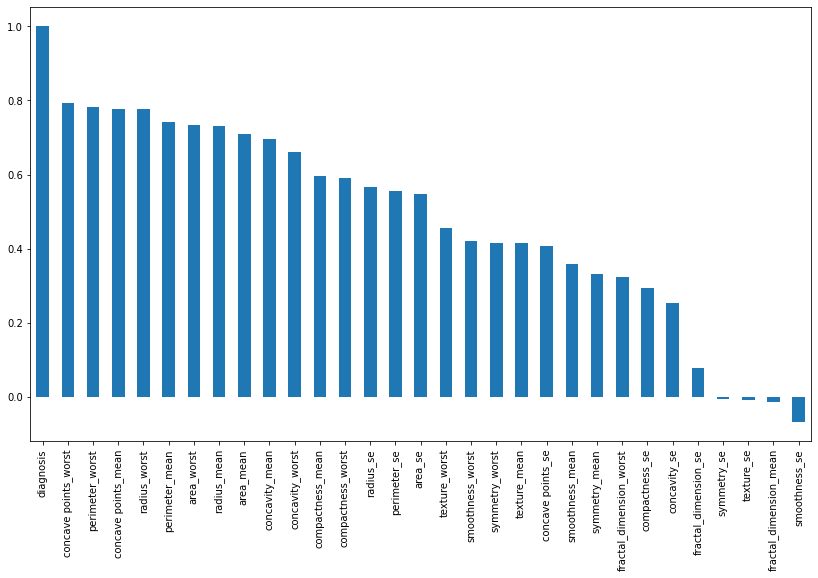

In [9]:
plt.figure(figsize=(14, 8))
bars = df.corr()['diagnosis'].sort_values(ascending=False).plot(kind='bar')


Define VIF calculation function

In [10]:
def calculate_variance_inflation_factor(df, features):
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, targets = df[X], df[feature]
        r2 = LinearRegression().fit(X, targets).score(X, targets)
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'vif': vif})


Use VIF fucntion to remove features with high correlation

In [11]:
all_features = df.columns
features_set = ['compactness_se', 'smoothness_worst', 'fractal_dimension_worst', 'compactness_mean', 'concavity_worst', 'area_se', 'area_mean', 'concave points_worst',
                'concavity_mean', 'diagnosis', 'radius_mean', 'radius_worst', 'perimeter_mean', 'perimeter_worst', 'texture_worst', 'concave points_mean', 'radius_se', 'compactness_worst']
features_to_drop = set(all_features) - set(features_set)
calculate_variance_inflation_factor(df=df, features=features_to_drop)


,vif
area_worst,4.838257
concave points_se,3.659977
concavity_se,3.609423
fractal_dimension_mean,4.525553
fractal_dimension_se,4.199567
perimeter_se,4.265756
smoothness_mean,2.762636
smoothness_se,1.878515
symmetry_mean,3.026111
symmetry_se,2.660047


drop features to prepare for training

In [12]:
drop_feature_set = True
if drop_feature_set:
    x = df.drop(features_set, axis=1)
else:
    x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']


Define training and testing sets

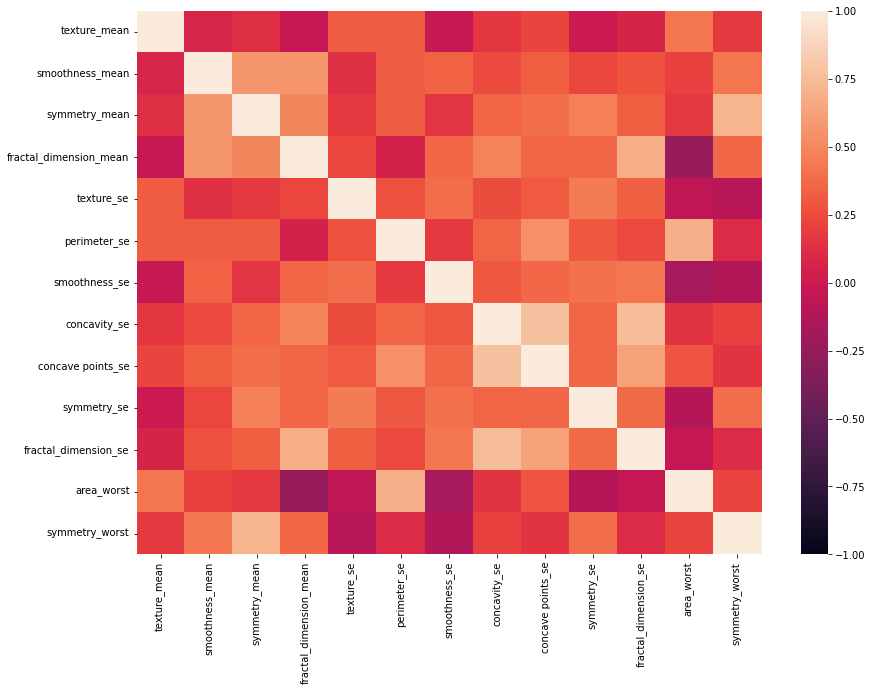

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, shuffle=False)

import seaborn as sns
corr = x_train.corr()
plt.figure(figsize = (14,10))
sns.heatmap(round(corr, 4), vmin=-1, vmax=1)
plt.show()

Scale training and testing sets using standart scaler

In [14]:
from sklearn.preprocessing import StandardScaler

scale_df = True
if scale_df:
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

Conduct linear regression and display accuarcy

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'accuracy: {round(model.score(x_test, y_test)*100,2)}%')


accuracy: 51.4%
